<a href="https://colab.research.google.com/github/clunabar/2025_Intro_Python/blob/main/FEEDBACK_CLAUDIALUNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feedback on challenging Excercise***

I found the Exercise 2 of Clustering Penguin Dataset particulaly challenging due:

1.	I was not completaly familiarice with the concept of "clustering" , so in order to understand the exercise I needed it first learn deeper into this technique. I needed to understand what is "happening with the data" and knowing how to write the code correctly so it will give exactly what the command was expecting.

2.	In Q3 (Train a k-means clustering algorithm, perform elbow test and silhouette analysis); When it came to plot the silhouette analysis results and interpreting them, I was confused because when performing the silhouette analysis to find the optimal number of clusters, I noticed that the graph didn’t stay the same: in one execution, the curve looked stable, while in another, the Silhouette Score values varied slightly, especially between 3 and 8 clusters. In one of the plots, the score decreased smoothly and consistently, while in another, small oscillations appeared; sometimes even the highest point of the curve seemed to shift. ***(FIG -EXAMPLE 1 and FIG -EXAMPLE 2 at the end of the document)***. At first, I thought something was wrong with my data or with the way I had written the code, but after checking the Scikit-learn documentation (given in the "hint"), I realized that the issue wasn’t an error, it was a feature of the K-Means algorithm itself. (The method chooses the initial cluster centers randomly every time it runs, which causes small variations in the results from one execution to another. In other words, the algorithm was starting from different points each time, producing slightly different graphs even with the same data.) So, I discovered that the solution was to use the random_state parameter in the KMeans() function. This parameter is able to set a fixed random seed so that the algorithm always starts from the same initial points, so I was able to have stable results.

In conclusion, this experience taught me the importance of understending the concepts and thecniques and also, that controlling randomness in models not only improves result consistency but also prevents confusion when interpreting the results. In short, I learned that small details in the code (like setting random_state) can make a big difference in the stability and reliability of an analysis.





In [82]:
import pooch
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Exercise 2: Clustering Penguin Dataset


In [83]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [84]:
penguin_df = penguins.dropna()

In [85]:
X = np.vstack((penguin_df['culmen_length_mm'],penguin_df['flipper_length_mm'])).T
np.shape(X)

(334, 2)

### Q3: Train a k-means clustering algorithm, perform elbow test and silhouette analysis


In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [87]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, random_state=0)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)


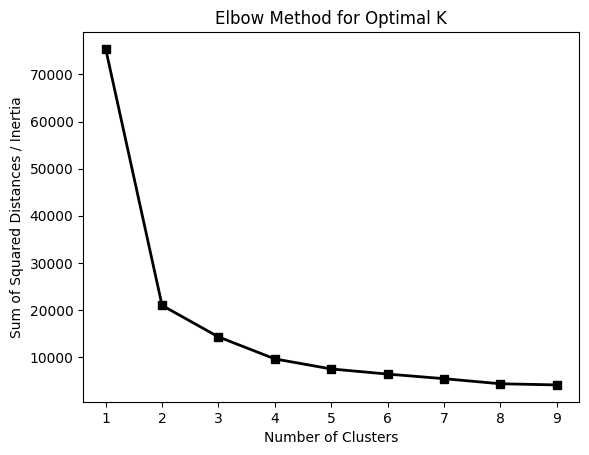

In [88]:
# To finish the elbow method analysis, plot the change in intertia when you change the number of clusters you used to train the k-means clustering algorithm.
plt.plot(K,Sum_of_squared_distances,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [135]:
# Perform silhouette analysis following instructions in the tutorial notebook
silhouette_avg  = []
# initialise kmeans

for num_clusters in range(2,10):

  kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

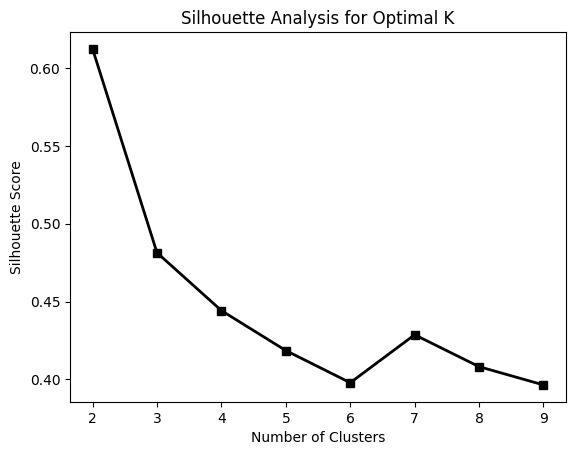

In [136]:
# Plot your silhouette analysis result here.
plt.plot(range(2,10), silhouette_avg,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


code snippet that reproduce the different plots:
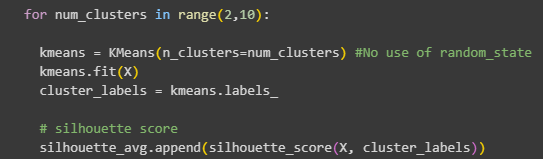

  

**FIG -EXAMPLE 1**:   

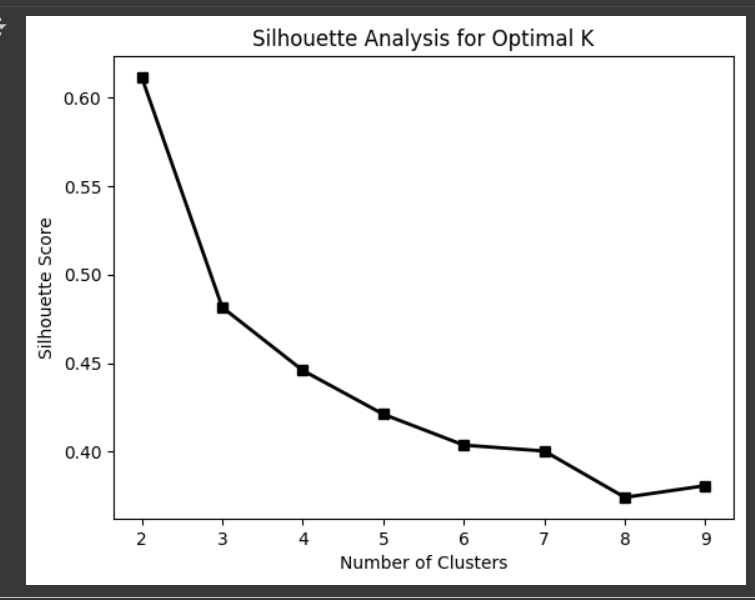

**FIG -EXAMPLE 2**

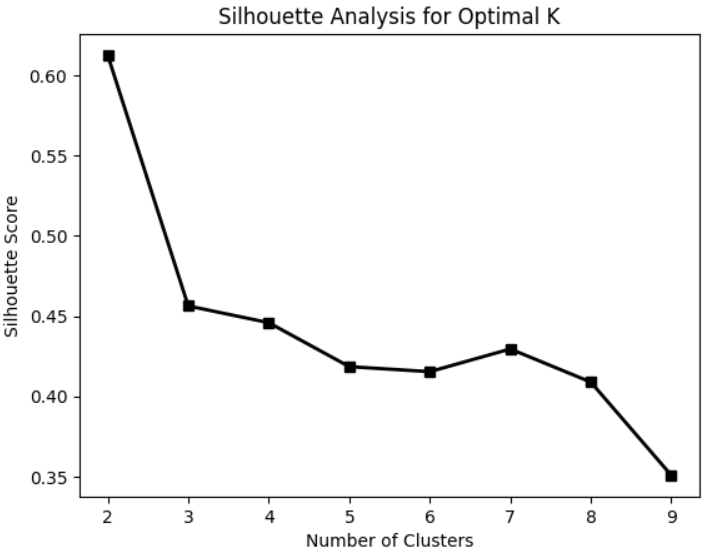